In [ ]:
# 데이터 구성 : Series, DataFrame
import pandas as pd
import pandas_datareader.data as web

# 행렬 연산
import numpy as np

# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn(SNS)를 사용한 파이썬 데이터 시각화
import seaborn as sns

# 날짜 데이터 생성
from datetime import datetime

# 선형 회귀분석 (절편(intercept) 추가)
import statsmodels.api as sm

# 자기상관 함수, 부분 자기상관 함수
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ARIMA
from statsmodels.tsa.arima_model import ARIMA

# 한글 폰트 적용
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

# minmaxscaler 함수 정의
def minmaxscaler(x):
  return (x - x.min()) / (x.max() - x.min())

# 글꼴 꺠짐 방지
path = "c:/Windows/Fonts/malgun.ttf"
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False  

Unknown system... sorry~~~~


In [ ]:
# 나눔 바른 고딕 글꼴 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
# 나눔 바른 고딕 글꼴 적용
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

## 데이터 불러오기 및 살펴보기

In [ ]:
# 데이터 구성하기
df_sales = pd.read_csv('/content/sample_data/Sales_data-전처리(최종).csv', encoding = 'euc-kr')
df_sales.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,주문번호,구매일,배송시작일,배송완료일,배송리드타임,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명
0,20200806162031-34198174203,2020-08-07,2020-08-08,2020-08-10,2,31.0,201901130758792,3000,3000,체험팩,맘큐 허그박스
1,20200806163134-45961790432,2020-08-07,2020-08-08,2020-08-12,4,14.0,201901140759534,42900,22076,팬티,2020 하기스 매직팬티 컴포트 썸머 4단계 공용 96매(팬티형)
2,20200806225722-70597181454,2020-08-07,2020-08-08,2020-08-11,3,30.0,201901140759701,11130,9400,SKC,그린핑거 힘센보습 울트라 크리미오일 180ml (EA)
3,20200806170653-47561291568,2020-08-07,2020-08-08,2020-08-10,2,27.0,201901150760795,11250,11100,FMC,크리넥스 비말차단용 스타일마스크 화이트 엠보 소형 3P (EA)
4,20200806190855-39842441181,2020-08-07,2020-08-08,2020-08-12,4,18.0,201901190768109,11310,8580,SKC,그린핑거 촉촉한 자연보습 워시 320ml (EA)


In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   주문번호       199999 non-null  object 
 1   구매일        199999 non-null  object 
 2   배송시작일      199999 non-null  object 
 3   배송완료일      199999 non-null  object 
 4   배송리드타임     199999 non-null  int64  
 5   구매시월령(수정)  168142 non-null  float64
 6   고객번호       199999 non-null  object 
 7   구매금액       199999 non-null  int64  
 8   결제금액       199999 non-null  int64  
 9   물품대분류      199999 non-null  object 
 10  상품명        199999 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 16.8+ MB


In [ ]:
df_sales.describe()

,배송리드타임,구매시월령(수정),구매금액,결제금액
count,199999.000000,168142.000000,199999.000000,199999.000000
mean,2.370507,14.845458,30572.028160,21713.797759
std,0.610462,38.521315,30560.954766,21341.455664
min,2.000000,-10.000000,0.000000,-35166.000000
25%,2.000000,2.000000,7400.000000,5998.000000
50%,2.000000,6.000000,17500.000000,12621.000000
75%,3.000000,13.000000,51200.000000,34799.000000
max,4.000000,1439.000000,598000.000000,539000.000000


## 데이터 전처리

In [ ]:
data = df_sales.copy()

# 1. 구매일 변수 dateime 타입으로 변환하기
data["구매일"] = pd.to_datetime(data["구매일"])
data = data.sort_values("구매일")

# 2. 배송시작일 변수 dateime 타입으로 변환하기
data["배송시작일"] = pd.to_datetime(data["배송시작일"])
data = data.sort_values("배송시작일")

# 3. 배송완료일 변수 dateime 타입으로 변환하기
data["배송완료일"] = pd.to_datetime(data["배송완료일"])
data = data.sort_values("배송완료일")

# 4. 배송리드타임, 구매시월령(수정), 구매금액, 결제금액
data["배송리드타임"] = minmaxscaler(data["배송리드타임"])
data["구매시월령(수정)"] = minmaxscaler(data["구매시월령(수정)"])
data["구매금액"] = minmaxscaler(data["구매금액"])
data["결제금액"] = minmaxscaler(data["결제금액"])
data.describe()

,배송리드타임,구매시월령(수정),구매금액,결제금액
count,199999.000000,168142.000000,199999.000000,199999.000000
mean,0.185253,0.017147,0.051124,0.099065
std,0.305231,0.026585,0.051105,0.037169
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.008282,0.012375,0.071694
50%,0.000000,0.011042,0.029264,0.083229
75%,0.500000,0.015873,0.085619,0.121855
max,1.000000,1.000000,1.000000,1.000000


## 범주형 변수 EDA 및 시각화

### 범주형 변수 레이블 개수 확인

In [ ]:
category = data[["구매일", "배송리드타임", "구매시월령(수정)", "구매금액"]]
group_leadtime = category.groupby("배송리드타임")
group_monthtime = category.groupby("구매시월령(수정)")

print(f"배송리드타임 변수 레이블 개수 : {len(group_leadtime)}")
print(f"구매시월령(수정) 변수 레이블 개수 : {len(group_monthtime)}")

배송리드타임 변수 레이블 개수 : 3
구매시월령(수정) 변수 레이블 개수 : 484


### 배송리드타임에 따른 구매금액 시각화

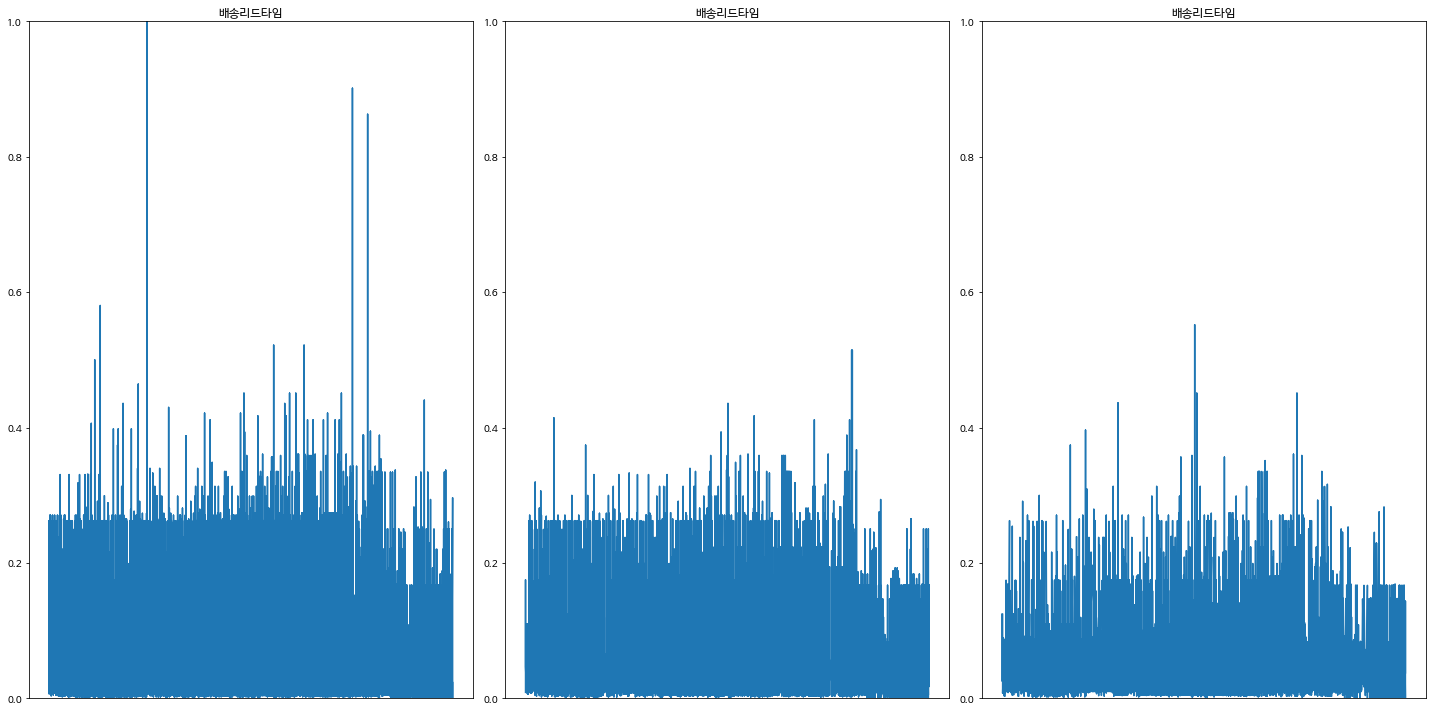

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (20, 10))
axes = axes.ravel()

for idx, element in enumerate(zip(axes, group_leadtime)):
  axis, group = element
  store, df = group
  df_x = df["구매일"]
  df_y = df["구매금액"]
  axis.plot(df_x, df_y)
  axis.set_ylim([0, 1])
  axis.get_xaxis().set_visible(False)
  axis.set_title(f"배송리드타임")

plt.tight_layout()
plt.show()

####각각 배송리드타임이 1일, 2일, 3일에 따른 구매금액 추이를 시각화 한 결과, 배송리드타임이 1일인 경우 비교적 많은 구매금액과 연관이 있음을 알 수 있다.

### 매출 변화량이 큰 구간 찾아내기

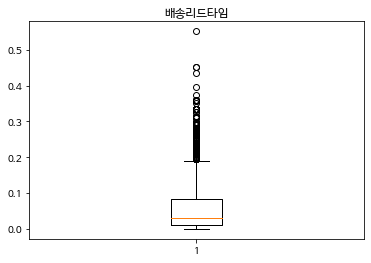

In [ ]:
# 구매금액의 boxplot
plt.boxplot(df["구매금액"])
plt.title("배송리드타임")
plt.show()

In [ ]:
# boxplot에서 사분위수 범위를 넘어가는 값들은 이상치로 간주되기 때문에, 사분위수 범위 밖에 있는 값들만 추출
df_desc = df.describe()
Q1 = df_desc.loc["25%", "구매금액"]
Q3 = df_desc.loc["75%", "구매금액"]
IQR = Q3 - Q1
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

# and = & , or = |
outlier = df[(df["구매금액"] > upper_bound) | (df["구매금액"] < lower_bound)]
outlier_date = pd.to_datetime(outlier["구매일"])
print(outlier)

              구매일  배송리드타임  구매시월령(수정)      구매금액
199253 2019-01-12     1.0        NaN  0.262475
198996 2019-01-16     1.0   0.011732  0.254047
197510 2019-01-27     1.0   0.013112  0.237592
196296 2019-01-31     1.0   0.008282  0.290970
195517 2019-02-01     1.0   0.041408  0.200669
...           ...     ...        ...       ...
10172  2020-06-26     1.0        NaN  0.229431
10178  2020-06-26     1.0        NaN  0.229431
10179  2020-06-26     1.0        NaN  0.229431
8724   2020-06-30     1.0   0.015183  0.275418
6974   2020-07-07     1.0   0.025535  0.282441

[328 rows x 4 columns]


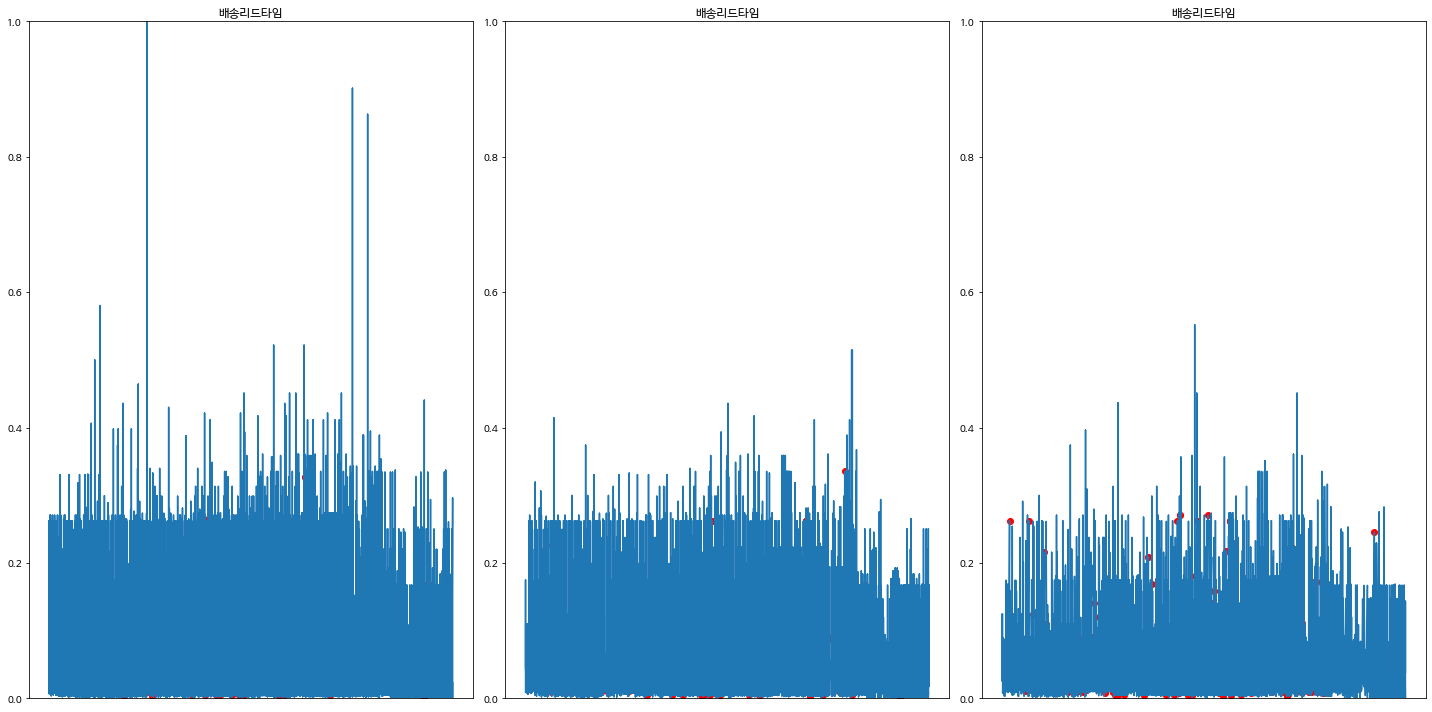

In [ ]:
# 배송리드타임에 따른 구매금액 추이 그래프 위에 이상치로 뽑은 날짜들을 표시
fig, axes = plt.subplots(1, 3, figsize = (20, 10))
axes = axes.ravel()

for idx, element in enumerate(zip(axes, group_leadtime)):
  axis, group = element
  store, df = group
  df_x = df["구매일"]
  df_y = df["구매금액"]
  outlier_x = outlier_date
  outlier_y = [df[df["구매일"] == i]["구매금액"].values[0] for i in outlier_date]

  axis.plot(df_x, df_y)
  axis.scatter(outlier_x, outlier_y, color = "red")
  
  axis.set_ylim([0, 1])
  axis.get_xaxis().set_visible(False)
  axis.set_title(f"배송리드타임")

plt.tight_layout()
plt.show()

#### 시각화 분석 내용 정리

#### 배송리드타임에 따른 구매 금액을 그래프로 시각화함. 배송리드타임에 따른 구매금액 추세 시각화를 통하여 배송리드타임이 1일인 경우 비교적 많은 구매금액과 연관이 있음을 알 수 있다.
#### 구매금액의 변화량이 큰 부분을 찾아 이상치로 표시함. 배송리드타임이 3일인 경우, 구매금액의 이상치가 자주 발견되기에 배송리드타임이 길수록 불안정한 매출과 연관이 있음을 발견하였습니다.

## 숫자형 변수들간의 상관관계 분석

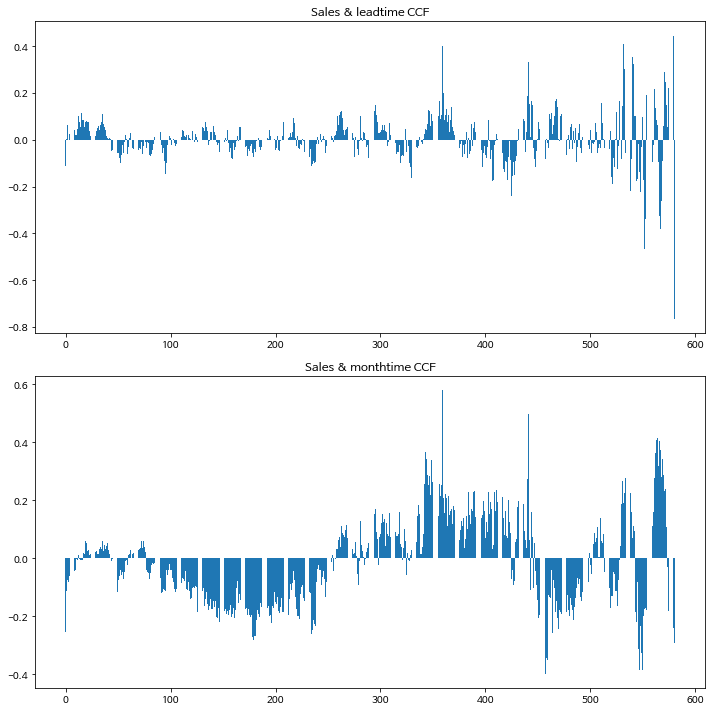

In [ ]:
import statsmodels.api as sm


numeric = data[["구매일", "배송리드타임", "구매시월령(수정)", "구매금액"]]
numeric = numeric.groupby("구매일").mean()

#calculate cross correlation
leadtime_ccf = sm.tsa.stattools.ccf(numeric["구매금액"], numeric["배송리드타임"])
monthtime_ccf = sm.tsa.stattools.ccf(numeric["구매금액"], numeric["구매시월령(수정)"])

fig, axes = plt.subplots(2,1, figsize = (10, 10))

axes[0].bar(list(range(len(leadtime_ccf))), leadtime_ccf)
axes[0].set_title("Sales & leadtime CCF")
axes[1].bar(list(range(len(monthtime_ccf))), monthtime_ccf)
axes[1].set_title("Sales & monthtime CCF")\

plt.tight_layout()
plt.show()


#### 숫자형 변수들과 매출액의 교차 상관관계를 시각화한 결과 다음과 같은 내용을 도출할 수 있었습니다.
#### 각 시점별로 0이 아닌 값을 가졌기 때문에 각 변수마다 매출액과 상관관계가 존재합니다.

### VAR(Vector Auto-Regression) - 벡터 자기회귀모형 분석

In [ ]:
from statsmodels.tsa.api import VAR

forecasting_model = VAR(numeric)
results_aic = []
for p in range(1,10):
  results = forecasting_model.fit(p)
  results_aic.append(results.aic)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


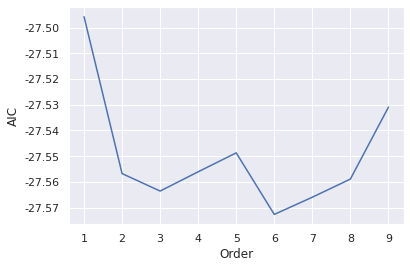

In [ ]:
# VAR 모델링 과정에서 최적의 모델을 찾기 위한 기준으로 AIC를 선택하였으며 AIC가 가장 낮은 순서(Order) p가 최적의 모델.
sns.set()
plt.plot(list(np.arange(1,10,1)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

In [ ]:
# 위의 그림을 통하여 최적의 모델을 찾기 위해서 AIC가 가장 낮은 값을 시각화시킨 결과 Order가 6인 지점이 가장 낮기에 p는 6를 사용합니다.
results = forecasting_model.fit(6)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 22, Aug, 2022
Time:                     17:54:52
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.1410
Nobs:                     575.000    HQIC:                  -27.4043
Log likelihood:           5536.46    FPE:                1.06020e-12
AIC:                     -27.5726    Det(Omega_mle):     9.61680e-13
--------------------------------------------------------------------
Results for equation 배송리드타임
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.163900         0.019247            8.515           0.000
L1.배송리드타임            0.154108         0.046363            3.324           0.001
L1.구매시월령(수정)        -0.506720         0.186108           -2.723

#### VAR 분석을 진행한 결과 위의 내용과 같이 나왔으며 내용을 정리하면 다음과 같습니다.

#### 구매금액 변수와 연관된 변수들 중에서 prob이 0.05보다 작아서 통계적으로 유의한 변수는 다음과 같습니다.
####  L2.배송리드타임  : prob = 0.018 coef = 0.028321

####  해당 결과를 해석하면 다음과 같은 회귀식이 나옵니다.
####  구매금액 = 0.028321 * L2.배송리드타임

####  위의 회귀식을 통하여 'L2.배송리드타임'이 증가하면 구매금액도 상승한다는 결론을 얻게 됩니다.

## ARIMA

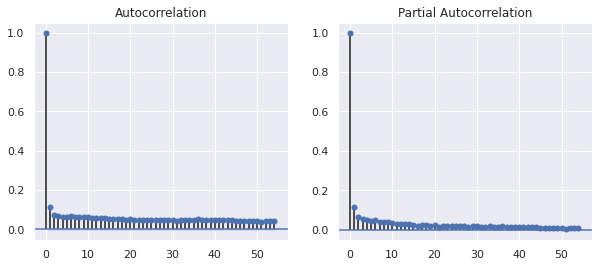

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

p,axes= plt.subplots(1,2,figsize=(10,4))
plot_acf(df_sales['구매금액'],ax=axes[0]) #q=0
plot_pacf(df_sales['구매금액'],ax=axes[1]) #p=1
plt.show()

In [ ]:
df_sales['구매금액2']=df_sales['구매금액'].diff(1) #1차분
df_sales.head()

,주문번호,구매일,배송시작일,배송완료일,배송리드타임,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,구매금액2
0,20200806162031-34198174203,2020-08-07,2020-08-08,2020-08-10,2,31.0,201901130758792,3000,3000,체험팩,맘큐 허그박스,NaN
1,20200806163134-45961790432,2020-08-07,2020-08-08,2020-08-12,4,14.0,201901140759534,42900,22076,팬티,2020 하기스 매직팬티 컴포트 썸머 4단계 공용 96매(팬티형),39900.0
2,20200806225722-70597181454,2020-08-07,2020-08-08,2020-08-11,3,30.0,201901140759701,11130,9400,SKC,그린핑거 힘센보습 울트라 크리미오일 180ml (EA),-31770.0
3,20200806170653-47561291568,2020-08-07,2020-08-08,2020-08-10,2,27.0,201901150760795,11250,11100,FMC,크리넥스 비말차단용 스타일마스크 화이트 엠보 소형 3P (EA),120.0
4,20200806190855-39842441181,2020-08-07,2020-08-08,2020-08-12,4,18.0,201901190768109,11310,8580,SKC,그린핑거 촉촉한 자연보습 워시 320ml (EA),60.0


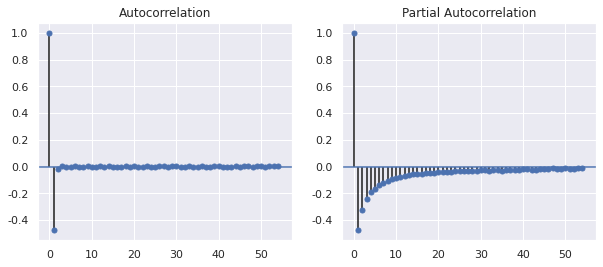

In [ ]:
p,axes= plt.subplots(1,2,figsize=(10,4))
plot_acf(df_sales['구매금액2'].iloc[1:],ax=axes[0]) 
plot_pacf(df_sales['구매금액2'].iloc[1:],ax=axes[1]) 
plt.show()

In [ ]:
# Summary
from statsmodels.tsa.arima_model import ARIMA

# (AR = 1, 차분 =1, MA=0) 파라미터로 ARIMA 모델을 학습한다.
model=ARIMA(df_sales['구매금액2'].iloc[1:],order=(1,1,0))
fit_res=model.fit()
print(fit_res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.구매금액2   No. Observations:               199997
Model:                 ARIMA(1, 1, 0)   Log Likelihood            -2458813.212
Method:                       css-mle   S.D. of innovations          52855.156
Date:                Mon, 22 Aug 2022   AIC                        4917632.423
Time:                        17:55:48   BIC                        4917663.041
Sample:                             1   HQIC                       4917641.435
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3755     71.434     -0.005      0.996    -140.383     139.632
ar.L1.D.구매금액2    -0.6545      0.002   -387.158      0.000      -0.658      -0.651
                                    Root

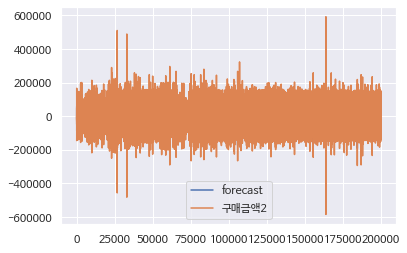

In [ ]:
#학습 데이터에 대한 예측 결과
fit_res.plot_predict()
#plt.figure(figsize = (10,4))
sns.set(rc={'figure.figsize':(6,4)})
plt.show()

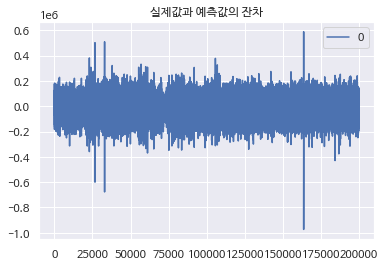

In [ ]:
residuals = pd.DataFrame(fit_res.resid)
residuals.plot(title = "실제값과 예측값의 잔차")